# Dimensionality Reduction

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
columns = ["Country", "Agr", "Min", "Man", "Pow", "Con", "Ser", "Fin", "Soc", "Tra"]

df = pd.read_csv('assets/eurojob.txt', sep='\s+', names=columns, skiprows=1)
df.head()

,Country,Agr,Min,Man,Pow,Con,Ser,Fin,Soc,Tra
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,WGerm,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


Take a look at the dataset

In [3]:
df.describe()

,Agr,Min,Man,Pow,Con,Ser,Fin,Soc,Tra
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077,6.546154
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542,1.391469
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000,3.200000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000,5.700000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000,6.700000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000,7.075000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000,9.400000


1. Magnitude of features
We can see that the magnitude of the features is very different. 
2. Variance & Mean of features
As we can tell from the description of the dataset, the mean and variance of the features are very different.

All in all, we will need to scale the features before we can use them in a model.

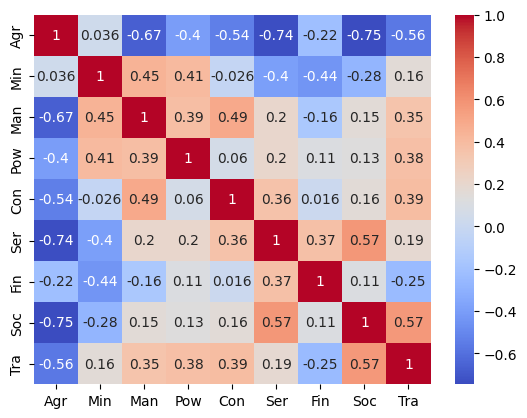

In [4]:
corr = df.iloc[:, 1:].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

1. Relationships: Agriculture tends to be negatively correlated with most other sectors, suggesting that regions or entities focusing on agriculture might not be as involved in these other sectors.
2. Clusters: Certain sectors like Manufacturing, Power, Construction, Services, Social, and Trade are positively correlated, indicating that these sectors often grow together.

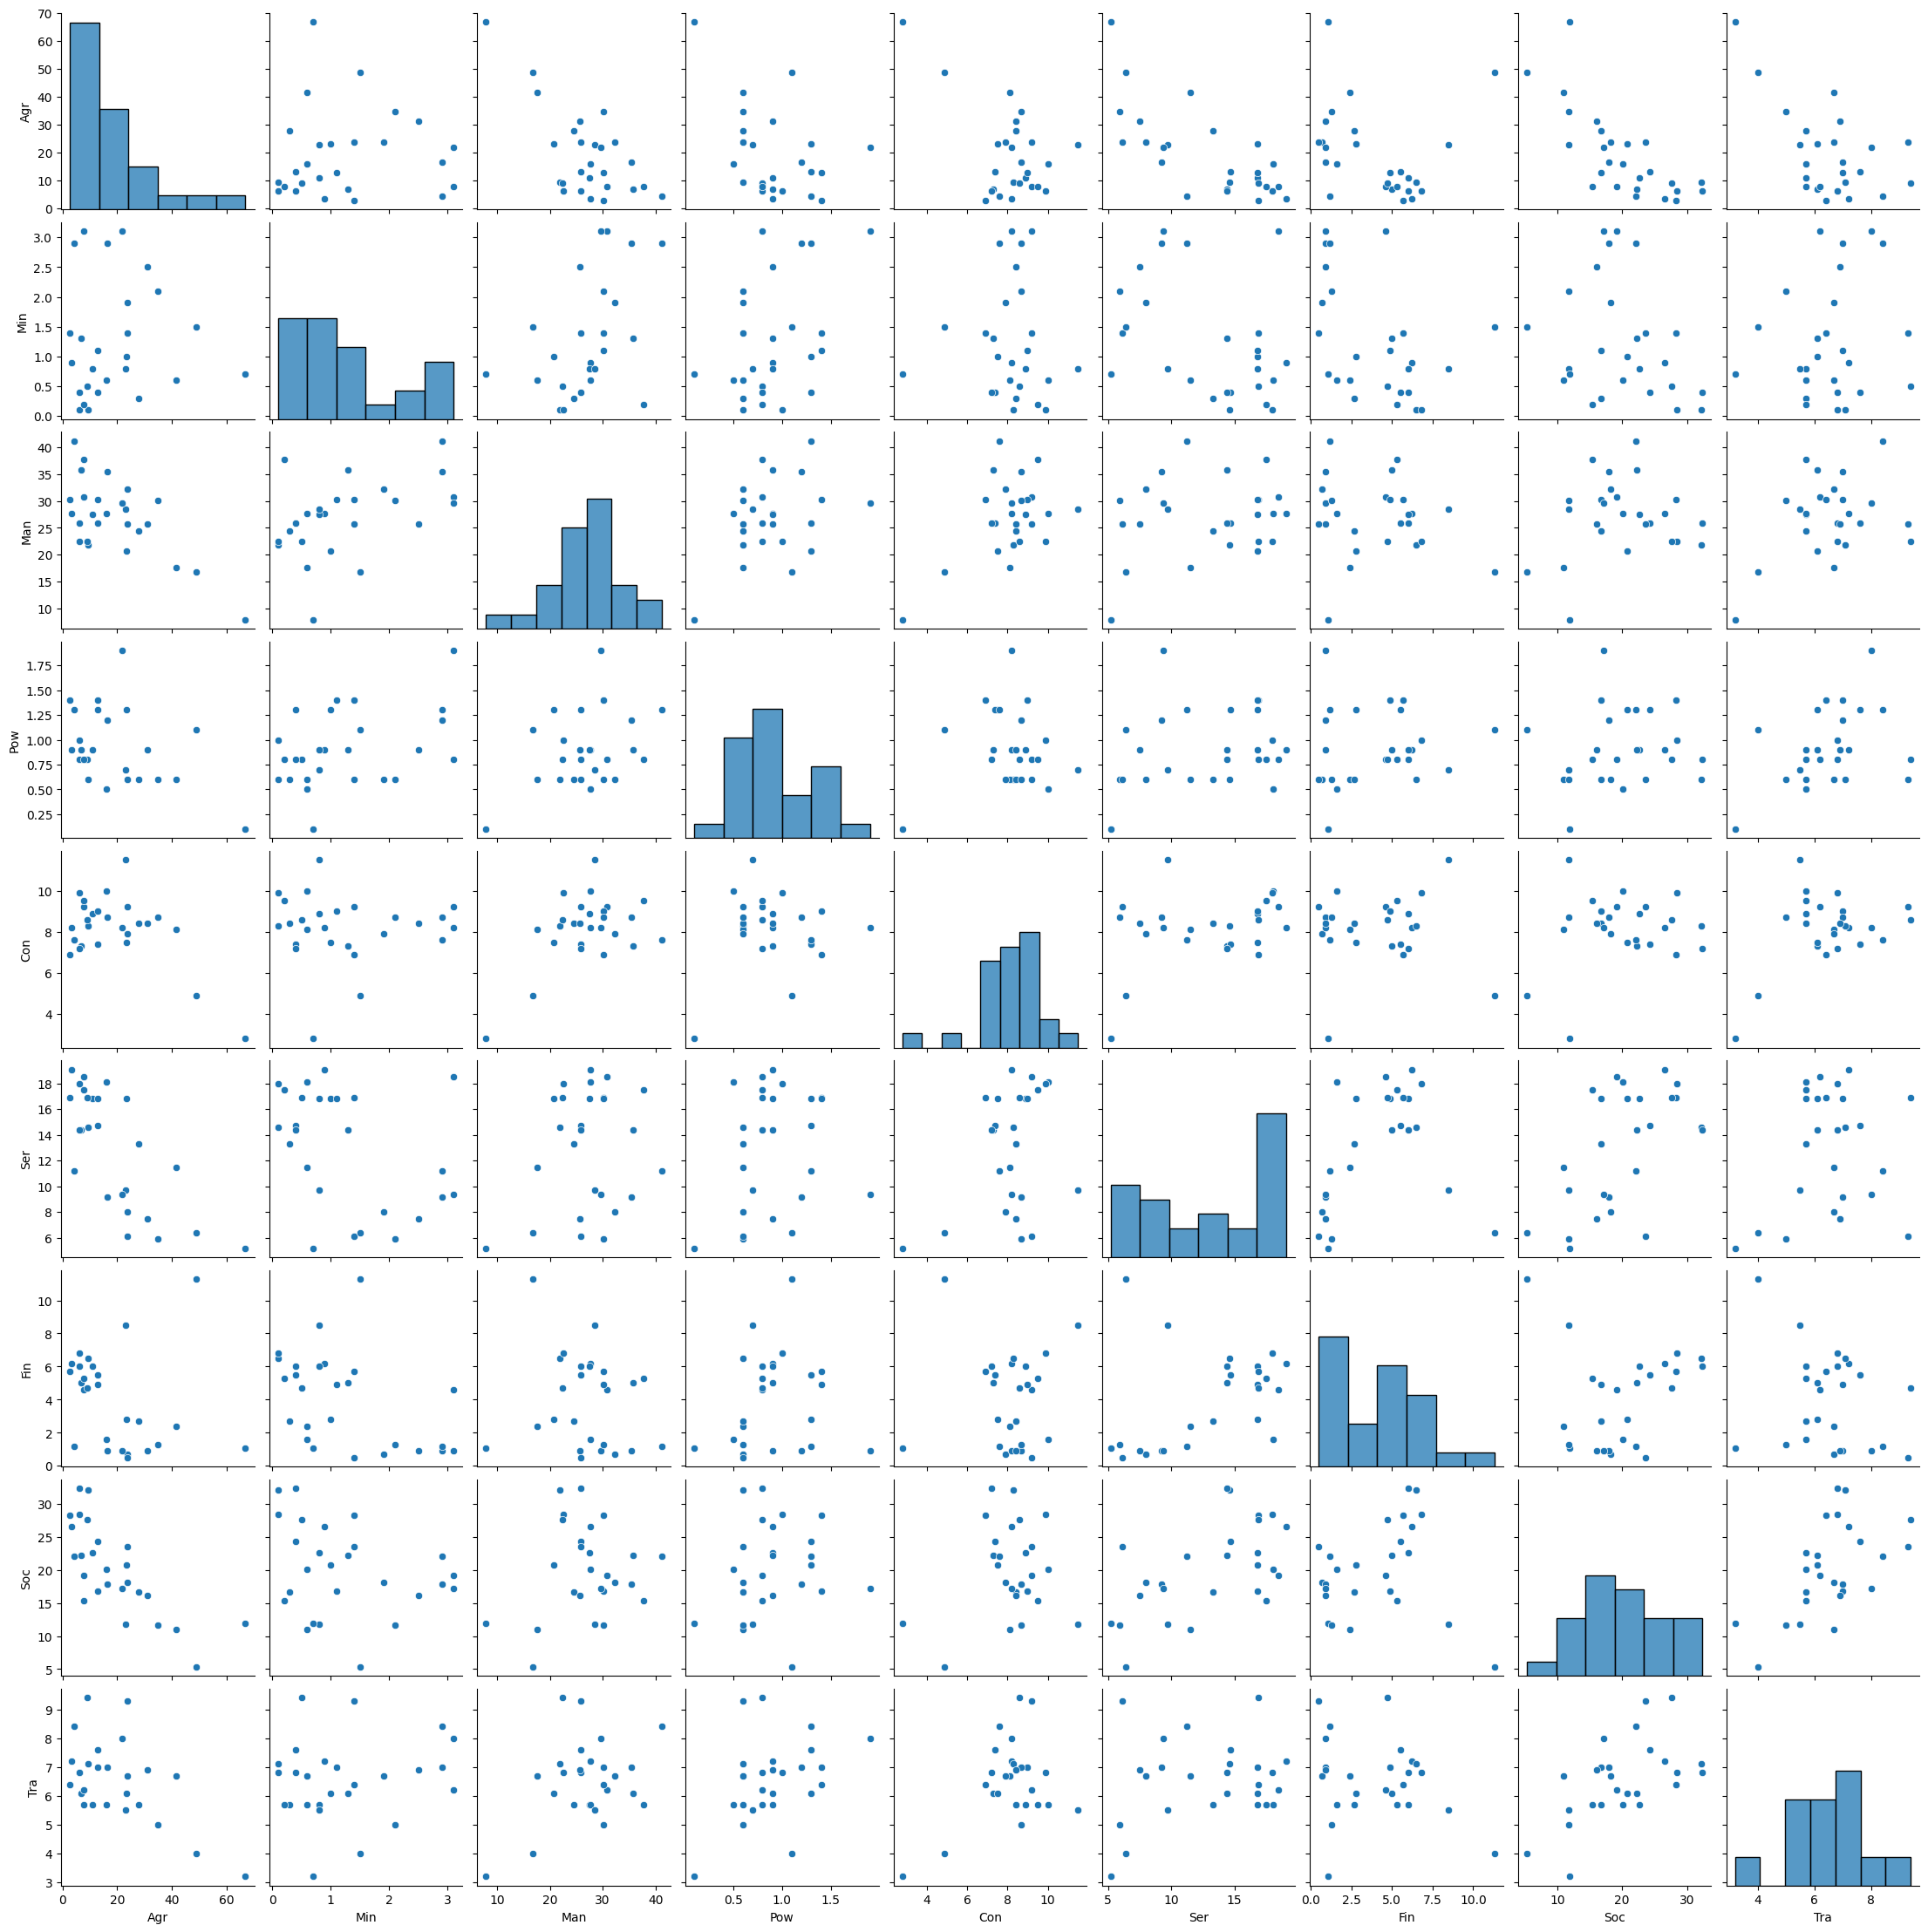

In [5]:
sns.pairplot(df.iloc[:, 1:])
plt.show()

Most variables do not exhibit strong linear relationships with one another.

## Perform PCA

We scale the data to have zero mean, unit variance and prepare the dataset for PCA. This is important as the features have different magnitudes and variances.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:])
df_scaled = pd.DataFrame(df_scaled, columns=columns[1:])
df_scaled.describe()

,Agr,Min,Man,Pow,Con,Ser,Fin,Soc,Tra
count,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01
mean,1.451830e-16,2.348549e-16,2.476651e-16,-3.031763e-16,8.369374e-16,1.537232e-16,3.416071e-17,-1.878839e-16,-4.697097e-16
std,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00
min,-1.077805e+00,-1.213035e+00,-2.780645e+00,-2.189401e+00,-3.325040e+00,-1.729156e+00,-1.271774e+00,-2.198486e+00,-2.452388e+00
25%,-7.498209e-01,-7.662337e-01,-5.832190e-01,-8.340577e-01,-3.968596e-01,-8.264284e-01,-1.008335e+00,-5.634051e-01,-6.201441e-01
50%,-3.070431e-01,-3.194325e-01,7.891927e-02,-1.563858e-01,1.144100e-01,3.214841e-01,2.361865e-01,-5.570876e-02,1.127535e-01
75%,2.980866e-01,5.741699e-01,4.645602e-01,7.245876e-01,5.017355e-01,8.731508e-01,6.994755e-01,6.125092e-01,3.875901e-01
max,3.126945e+00,1.940856e+00,2.065334e+00,2.689836e+00,2.066530e+00,1.369094e+00,2.652556e+00,1.848152e+00,2.091577e+00


In [7]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df.iloc[:, 1:])

lambdas = pca.explained_variance_
proportions_var = pca.explained_variance_ratio_
cumul_proportions_var = pca.explained_variance_ratio_.cumsum()

We show a table with the eigenvalues, proportion and cumulative proportion of variance. This showcases the importance of each principal component.

In [8]:
table = pd.DataFrame({'Lambda': lambdas, 'Proportion of variance': proportions_var,
                      'Cumulative proportion of variance': cumul_proportions_var})
table

,Lambda,Proportion of variance,Cumulative proportion of variance
0,303.458112,0.815784,0.815784
1,43.701656,0.117483,0.933266
2,15.207354,0.040882,0.974148
3,5.639360,0.015160,0.989308
4,2.443399,0.006569,0.995877
5,1.046033,0.002812,0.998689
6,0.420847,0.001131,0.999820
7,0.064927,0.000175,0.999995
8,0.001912,0.000005,1.000000


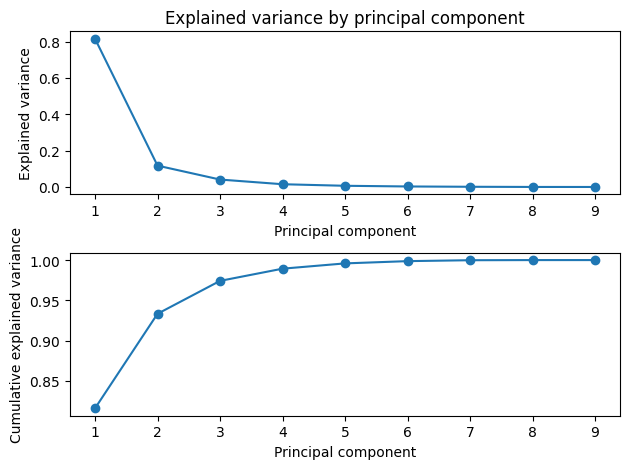

In [9]:
fig, axes = plt.subplots(2, 1)

axes[0].plot(range(1, len(lambdas) + 1), proportions_var, marker='o')
axes[0].set_xlabel('Principal component')
axes[0].set_ylabel('Explained variance')
axes[0].set_title('Explained variance by principal component')

axes[1].plot(range(1, len(lambdas) + 1), cumul_proportions_var, marker='o')
axes[1].set_xlabel('Principal component')
axes[1].set_ylabel('Cumulative explained variance')

plt.tight_layout()
plt.show()

From the table and those plots, we reach 0.93% of informations retained with the 2 first components. If we take the 3rd component, we reach 97%. So we can say that we can reduce the dimensionality of the dataset to 2 or 3 depending on the information we want to keep. It is not necessary to keep more dimensions.

We decide to keep 2 components for the sake of simplicity.

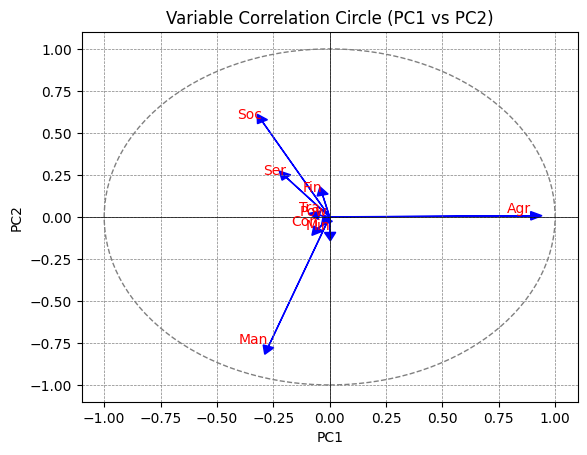

In [10]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

# Draw a circle
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
ax.add_artist(circle)

for i in range(len(columns[1:])):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.05, head_length=0.05, color='blue')
    plt.text(pca.components_[0, i], pca.components_[1, i], columns[i + 1],
             color='red', ha='right', va='bottom')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Variable Correlation Circle (PC1 vs PC2)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

plt.show()


Text(0, 0.5, 'PC2')

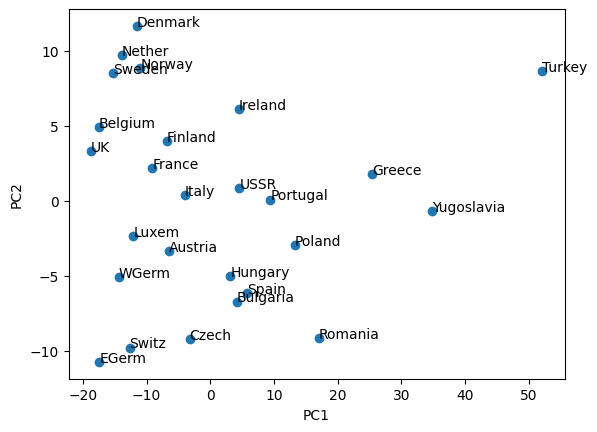

In [53]:
fig = plt.figure()

for i, txt in enumerate(df['Country']):
    plt.annotate(txt, (pca.transform(df.iloc[:, 1:])[i, 0], pca.transform(df.iloc[:, 1:])[i, 1]))

plt.scatter(pca.transform(df.iloc[:, 1:])[:, 0], pca.transform(df.iloc[:, 1:])[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')

With these 2 plots, we notice that the PC2 represents Manufacturing, Social and Services sectors. Whereas the PC1 represents Agriculture. We notice that East Germany is very involved in Manufacturing and not in Social at all. On the other hand, Denmark is the complete opposite. A country Yugoslavia is example of an economy based on Agriculture.

## PCA from Scratch

In [11]:
# Standardize the data manually to get the same results as with the StandardScaler
normalized_df = (df.iloc[:, 1:] - df.iloc[:, 1:].mean()) / df.iloc[:, 1:].std()

In [12]:
normalized_df.describe()

,Agr,Min,Man,Pow,Con,Ser,Fin,Soc,Tra
count,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01
mean,1.451830e-16,2.711506e-16,2.476651e-16,-3.074464e-16,8.540177e-16,1.622634e-16,1.708035e-17,-2.049643e-16,-4.440892e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.056874e+00,-1.189479e+00,-2.726647e+00,-2.146885e+00,-3.260470e+00,-1.695577e+00,-1.247077e+00,-2.155793e+00,-2.404764e+00
25%,-7.352599e-01,-7.513540e-01,-5.718933e-01,-8.178608e-01,-3.891529e-01,-8.103798e-01,-9.887536e-01,-5.524641e-01,-6.081013e-01
50%,-3.010805e-01,-3.132294e-01,7.738671e-02,-1.533489e-01,1.121882e-01,3.152411e-01,2.315999e-01,-5.462693e-02,1.105639e-01
75%,2.922980e-01,5.630199e-01,4.555388e-01,7.105166e-01,4.919921e-01,8.561948e-01,6.858921e-01,6.006147e-01,3.800633e-01
max,3.066222e+00,1.903166e+00,2.025227e+00,2.637601e+00,2.026400e+00,1.342507e+00,2.601046e+00,1.812262e+00,2.050960e+00


We calculate the covariance matrix of the data and then calculate the eigenvalues and eigenvectors of the covariance matrix. We then sort the eigenvalues and eigenvectors in descending order.

In [13]:
cov_matrix = np.cov(normalized_df, rowvar=False)
lambdas, vectors = np.linalg.eig(cov_matrix)

idx = lambdas.argsort()[::-1]

In [14]:
variance_covariance_matrix = np.cov(normalized_df, rowvar=False)
correlation_matrix = normalized_df.corr()

print(np.allclose(variance_covariance_matrix, correlation_matrix))

True


We see that the variance-covariance matrix of the scaled data is the same as the covariance matrix of the non-scaled data.

Text(0.5, 1.0, 'Explained variance by principal component')

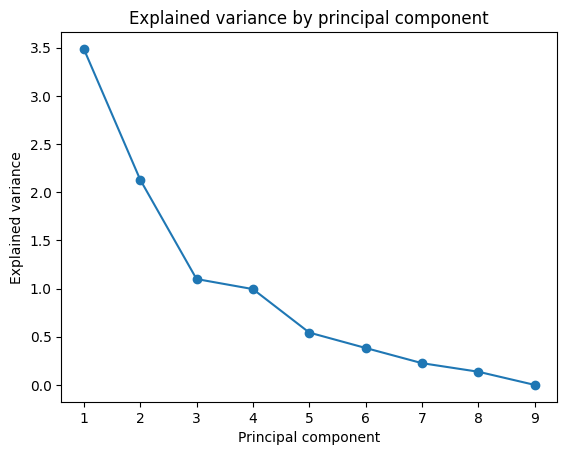

In [15]:
fig, ax = plt.subplots()

ax.plot(range(1, len(lambdas) + 1), lambdas[idx], marker='o')
ax.set_xlabel('Principal component')
ax.set_ylabel('Explained variance')
ax.set_title('Explained variance by principal component')


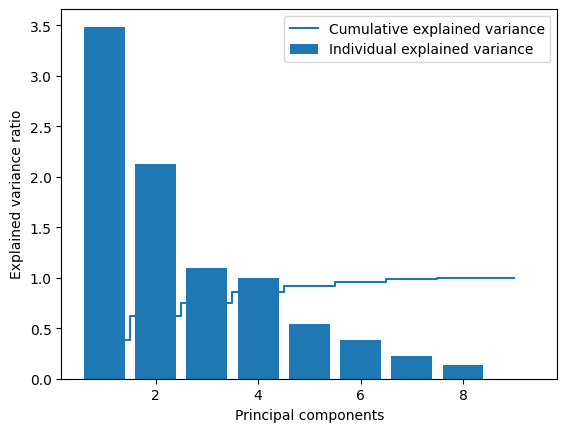

In [16]:
cumul_var = np.cumsum(lambdas[idx]) / np.sum(lambdas)

fig = plt.figure()
plt.bar(range(1, len(lambdas) + 1), lambdas[idx], label='Individual explained variance')
plt.step(range(1, len(lambdas) + 1), cumul_var, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

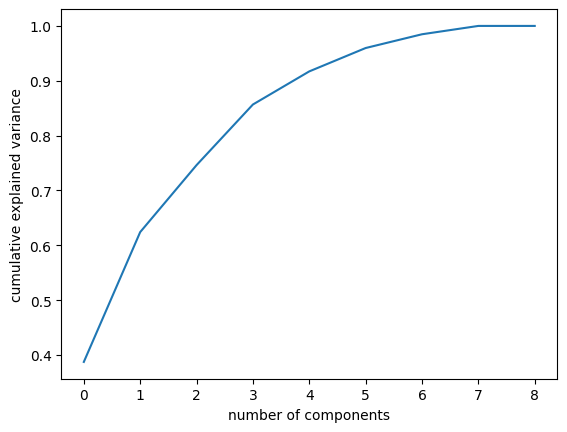

In [17]:
plt.figure()
plt.plot(cumul_var)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We keep the 3 first components as they represent roughly 75% of the variance.

We calculate the new projection of the data on the 3 first components. And calculate the new lower-dimensional representation of the data.

In [18]:
W = vectors[:, idx[:3]]

In [29]:
Y = normalized_df.dot(W)
Y.shape

(26, 3)

We plot individuals and variables

In [33]:
# Create a 3D plot of the first three principal components
import plotly
from plotly.graph_objs import Scatter3d

plotly.offline.init_notebook_mode(connected=True)

trace = Scatter3d(x=Y.iloc[:, 0], y=Y.iloc[:, 1], z=Y.iloc[:, 2],
                    mode='markers', marker=dict(size=5), text=df['Country'])

layout = dict(title='First three principal components',
              scene=dict(xaxis=dict(title='PC1'),
                         yaxis=dict(title='PC2'),
                         zaxis=dict(title='PC3'))
              )

plotly.offline.iplot(dict(data=[trace], layout=layout))

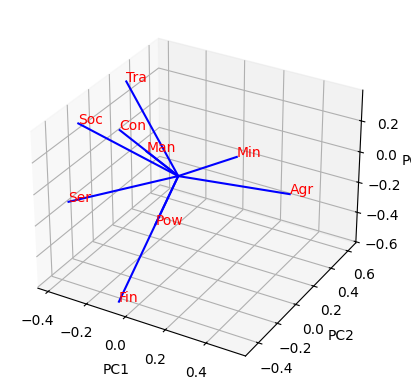

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(columns[1:])):
    ax.plot([0, vectors[i, 0]], [0, vectors[i, 1]], [0, vectors[i, 2]], color='b')
    ax.text(vectors[i, 0], vectors[i, 1], vectors[i, 2], columns[i + 1], color='r')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


In [43]:
loadings = pd.DataFrame(vectors[:, idx[:3]], columns=['PC1', 'PC2', 'PC3'], index=columns[1:])
loadings

,PC1,PC2,PC3
Agr,0.523791,0.053594,0.048674
Min,0.001323,0.617807,-0.201100
Man,-0.347495,0.355054,-0.150463
Pow,-0.255716,0.261096,-0.561083
Con,-0.325179,0.051288,0.153321
Ser,-0.378920,-0.350172,-0.115096
Fin,-0.074374,-0.453698,-0.587361
Soc,-0.387409,-0.221521,0.311904
Tra,-0.366823,0.202592,0.375106


- Agriculture is highly positively correlated to the first component.
- Mining is highly correlated to the second component. And slightly negatively correlated to the third component.
- Manufacturing is slightly negatively correlated to the first component and slightly positively correlated to the second component.
- Power is highly negatively correlated to the 3rd component.
- Construction is slightly negatively correlated to the 1st component.
- Services is slightly negatively correlated to the 1st and 2nd components.
- Finance if highly negatively correlated to the 2nd and 3rd components.
- Social is slightly negatively correlated to the 1st and 2nd components and slightly positively correlated to the 3rd comopnent.
- Trade is slightly negatively correlated to the 1st and slightly positively correlated to the 2nd and 3rd components.

This means that a country like USSR is highly not involved in Finance and Agriculture. On the other hand, Yugoslavia is high correlated with Finance.

In the end, we see that we can quite similar results with the PCA from scratch and the PCA from the library. The difference is that we have more axis with the PCA from scratch because each component retains less information. 

## Images

In [83]:
import pandas as pd

df_images = pd.read_csv('assets/mnist_sample.csv', header=None)
df_images.rename(columns={0: 'label'}, inplace=True)
for i in range(784):
    df_images.rename(columns={i + 1: 'pixel' + str(i)}, inplace=True)
df_images.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Take a look at the data

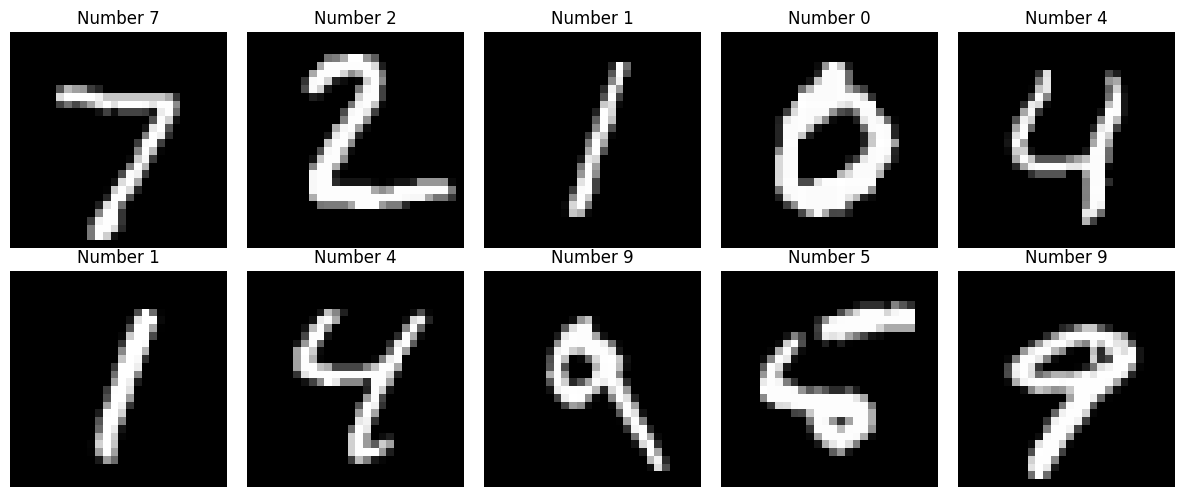

In [84]:
# We plot the 10 first images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i in range(10):
    axes[i // 5, i % 5].imshow(df_images.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
    axes[i // 5, i % 5].set_title(f'Number {df_images.iloc[i, 0]}')
    axes[i // 5, i % 5].axis('off')

plt.tight_layout()

### PCA on images

In [96]:
# Scale the data
scaler_images = StandardScaler()
df_images_scaled = scaler_images.fit_transform(df_images.iloc[:, 1:])
df_images_scaled = pd.DataFrame(df_images_scaled, columns=df_images.columns[1:])
df_images_scaled.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.031601,-0.028523,-0.021737,-0.010001,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
pca_images = PCA()
pca_images.fit(df_images_scaled)

df_pca_images = pd.DataFrame(pca_images.transform(df_images_scaled), columns=[f'PC{i}' for i in range(1, 785)])
df_pca_images.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC775,PC776,PC777,PC778,PC779,PC780,PC781,PC782,PC783,PC784
0,-5.458311,6.414007,-4.199424,-0.332835,3.324180,2.402098,-2.828567,8.078187,-3.819860,-2.615474,...,0.0,0.0,6.264230e-16,1.124969e-16,-5.554261e-16,-2.768737e-16,-8.107805e-17,-1.744157e-15,-1.060820e-16,-1.301455e-15
1,2.804432,-8.028850,16.185780,4.334011,0.955306,2.292588,-3.191137,5.094422,5.226337,-3.501062,...,0.0,0.0,-8.257920e-15,-4.181034e-16,-3.476368e-15,-5.689570e-16,-4.777125e-15,3.221891e-15,-3.978226e-15,3.061459e-17
2,-7.411241,-3.864044,1.089598,3.921139,6.184828,-2.488432,1.615672,-1.004840,-0.715438,-0.345566,...,0.0,0.0,5.982737e-16,-5.202793e-16,-1.541779e-16,1.249601e-16,1.202815e-16,4.213464e-16,-6.388821e-16,-1.108524e-15
3,8.751242,0.045991,-2.851232,-0.199020,-5.993041,-4.908870,-2.431089,6.922161,-0.273463,-0.182528,...,0.0,0.0,-1.408273e-15,2.617879e-16,-1.829364e-16,-1.243266e-15,-2.918289e-16,-1.134992e-15,-6.656542e-16,-4.294327e-16
4,-0.065756,6.296290,-0.396556,2.681856,-2.088390,0.426951,3.671710,-4.467025,-4.441415,-4.899627,...,0.0,0.0,7.753036e-16,1.342927e-15,-1.058062e-15,-1.052923e-15,1.408782e-15,7.687756e-16,-5.853733e-16,2.296169e-16


Text(0.5, 1.0, 'Explained variance by principal component')

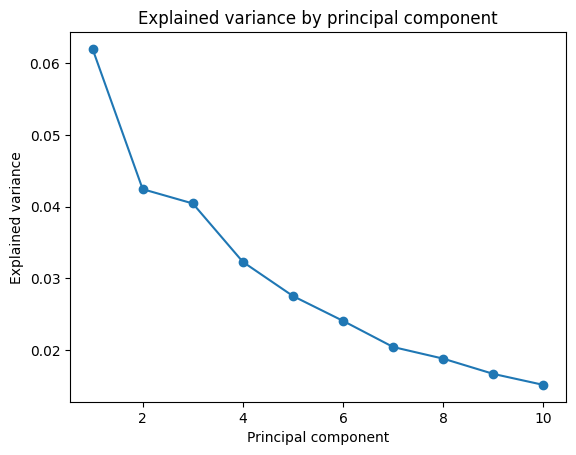

In [99]:
# Show the explained variance by principal component
# Assuming that we don't need to go further than 10 components for the plot
fig, ax = plt.subplots()

ax.plot(range(1, 11), pca_images.explained_variance_ratio_[:10], marker='o')
ax.set_xlabel('Principal component')
ax.set_ylabel('Explained variance')
ax.set_title('Explained variance by principal component')

Text(0.5, 0, 'Principal component')

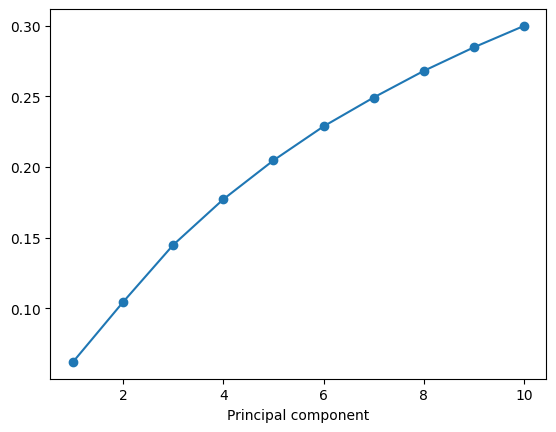

In [100]:
# Show the cumulative explained variance
fig, ax = plt.subplots()

ax.plot(range(1, 11), pca_images.explained_variance_ratio_[:10].cumsum(), marker='o')
ax.set_xlabel('Principal component')

We see that we retain next to no information with the 2 first components meanign that if we plot the data on the 2 first components, we will not be able to distinguish the images.

Let's try

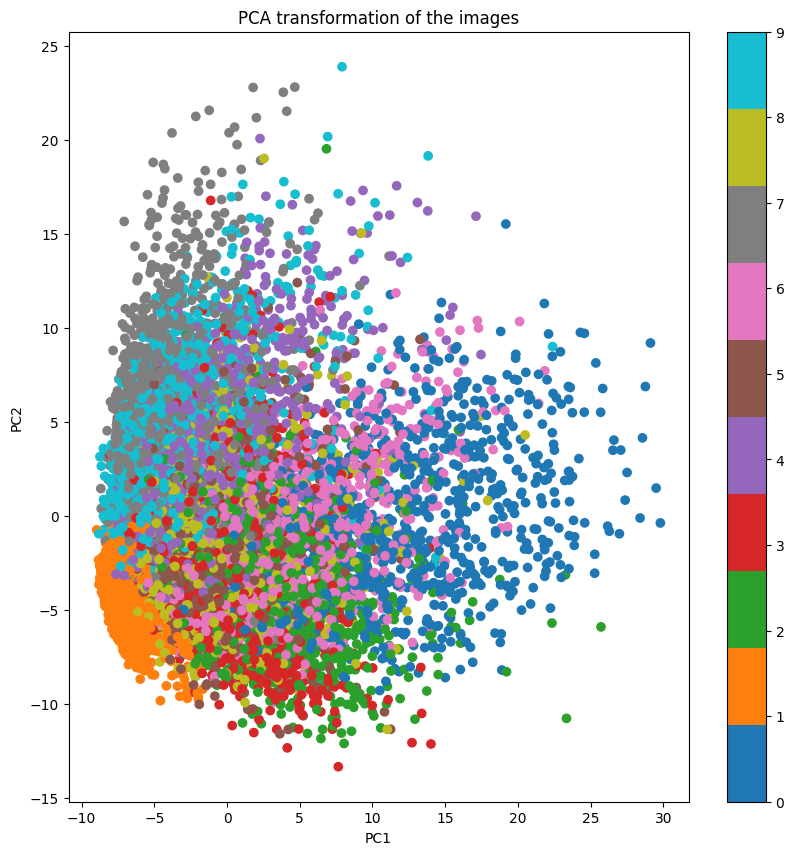

In [102]:
# Plot the PCA transformation of all the images (colors are based on the label)
df_pca_images['label'] = df_images['label']

fig = plt.figure(figsize=(10, 10))
plt.scatter(df_pca_images['PC1'], df_pca_images['PC2'], c=df_pca_images['label'], cmap='tab10')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA transformation of the images')
plt.colorbar()
plt.show()

We notice that clusters are not very clear and relevant. We can't really distinguish the images. I believe that PCA isn't fit for this task. We should use another method like t-SNE.

### t-SNE on images

In [105]:
from sklearn.manifold import TSNE

tsne_images = TSNE(n_components=2)
df_tsne_images = pd.DataFrame(tsne_images.fit_transform(df_images_scaled), columns=['t-SNE1', 't-SNE2'])

df_tsne_images['label'] = df_images['label']

In [110]:
def plot_image_clusters_tsne(df_tsne, title):
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(df_tsne['t-SNE1'], df_tsne['t-SNE2'], c=df_tsne['label'], cmap='tab10', s=2)
    plt.xlabel('t-SNE1')
    plt.ylabel('t-SNE2')
    plt.title(title)
    plt.colorbar()
    plt.show()

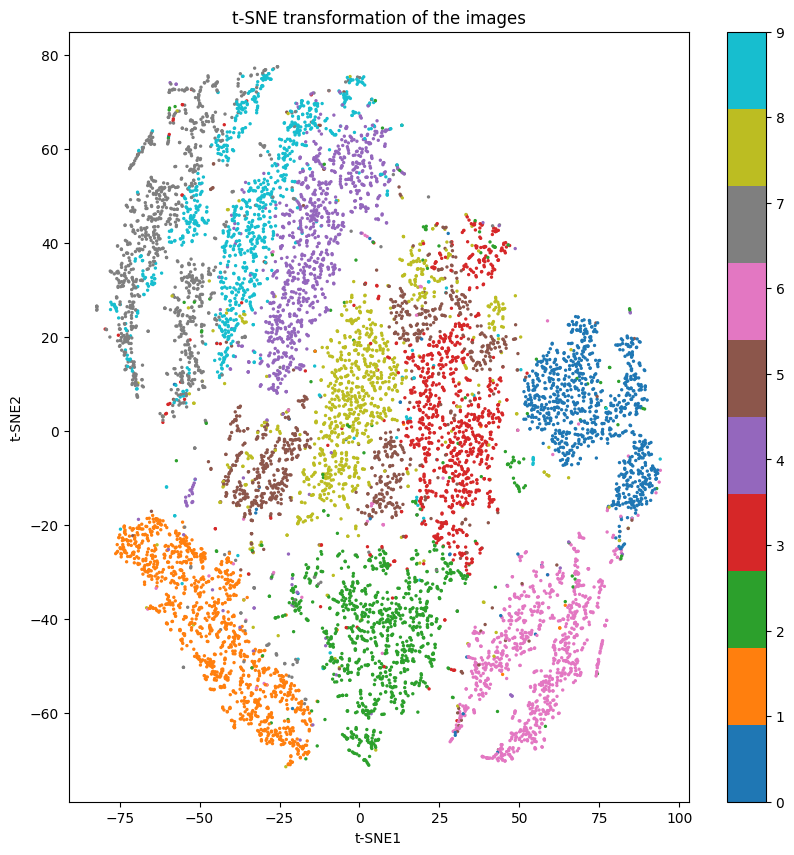

In [111]:
# Plot the t-SNE transformation of all the images (colors are based on the label)
plot_image_clusters_tsne(df_tsne_images, 't-SNE transformation of the images')

We notice that the plot is way more relevant as the t-SNE algorithm is better suited for this task as mentioned before.

Let's check the importance of `perplexity` parameter.

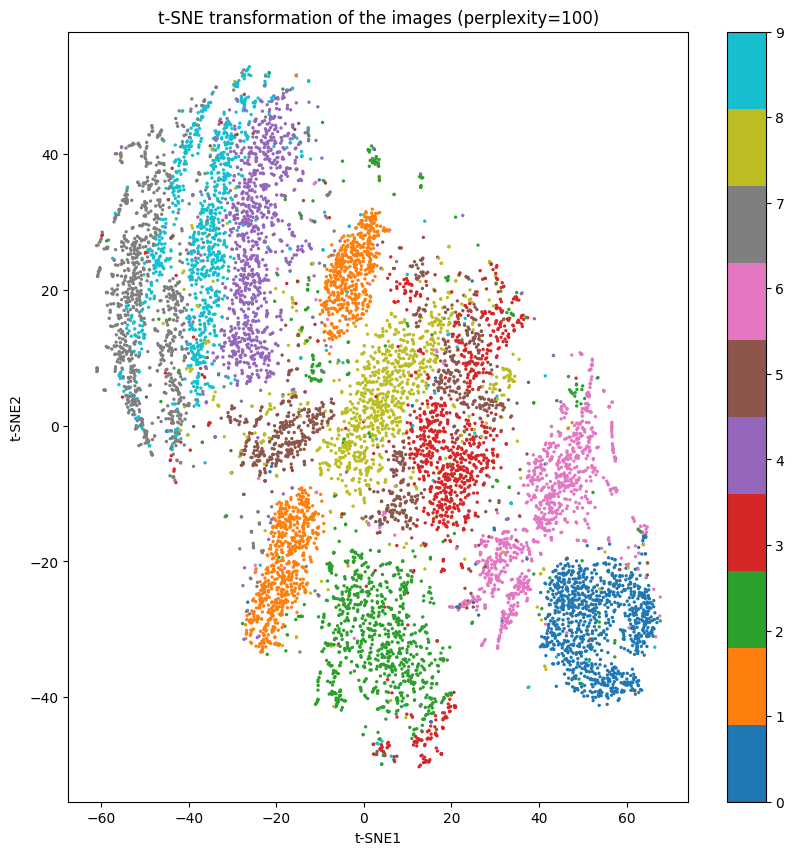

In [112]:
# Perplixity of 100
tsne_images = TSNE(n_components=2, perplexity=100)
df_tsne_images = pd.DataFrame(tsne_images.fit_transform(df_images_scaled), columns=['t-SNE1', 't-SNE2'])

df_tsne_images['label'] = df_images['label']

plot_image_clusters_tsne(df_tsne_images, 't-SNE transformation of the images (perplexity=100)')

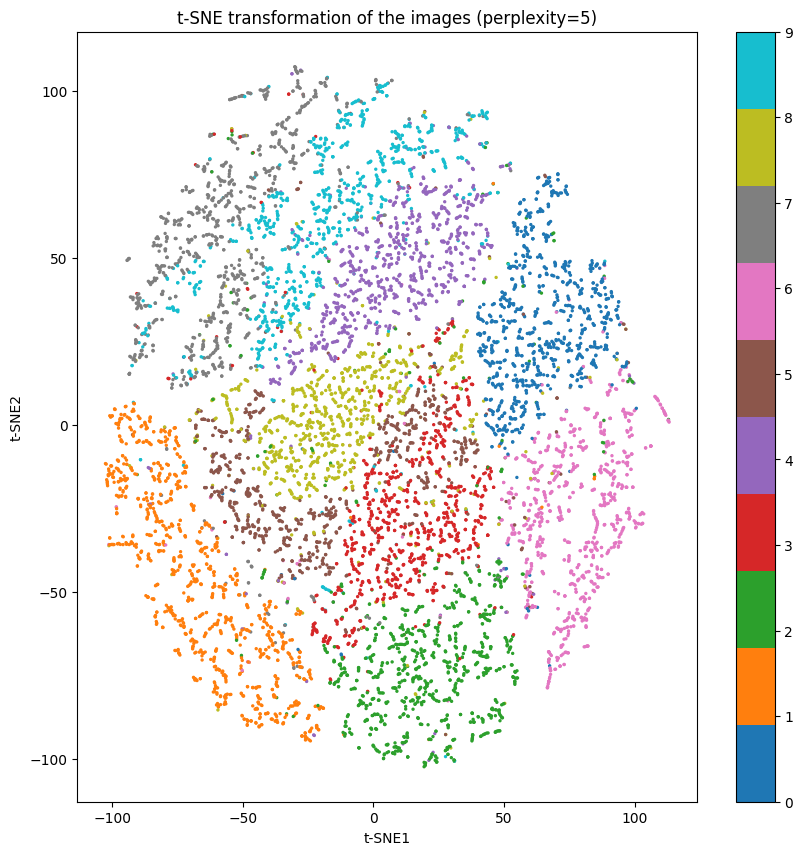

In [113]:
# Perplixity of 5
tsne_images = TSNE(n_components=2, perplexity=5)
df_tsne_images = pd.DataFrame(tsne_images.fit_transform(df_images_scaled), columns=['t-SNE1', 't-SNE2'])

df_tsne_images['label'] = df_images['label']

plot_image_clusters_tsne(df_tsne_images, 't-SNE transformation of the images (perplexity=5)')

We see that changing the `perplexity` changes the shape of the clusters and the inner/inter class distances.

A bigger `perplexity` minimizes the inner class distances and maximizes the inter class distances. This is why we see more distinct clusters with a bigger `perplexity`.